**Name : Aishwarya Bhavsar**<br>
**ID : 029371509**<br>
**CECS 457 - Applied Machine Learning<br>**
**Midterm**
<b>Date: 12th Oct, 2022

# **EXPLORATORY DATA ANALYSIS** - Data Preprocessing.

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score
from pandas.plotting import scatter_matrix
import seaborn as sns

In [78]:
dataset = pd.read_csv('/content/Data Midterm.csv')

In [79]:
df = pd.DataFrame(dataset)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


**Missing Values**

In [81]:
dataset.isnull().sum()
dataset.isna().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

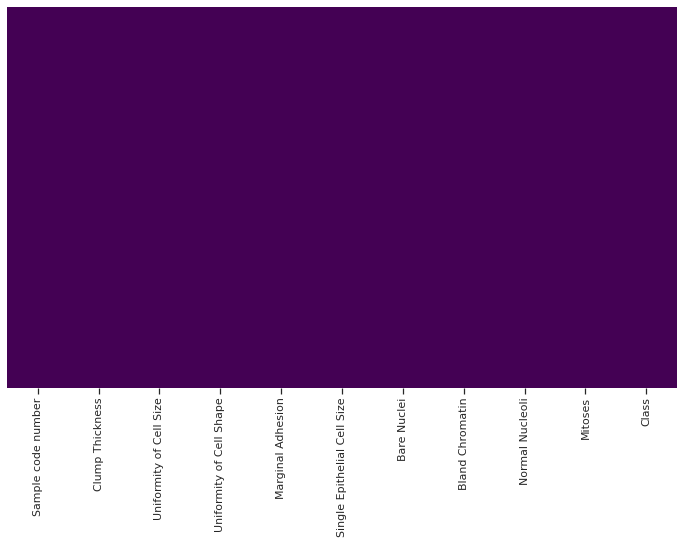

In [82]:
plt.figure(figsize=(12,7))
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**The value is 0 throughout. The heat map also suggests there are no missing values.**

In [83]:
import pandas as pd
data = pd.read_csv('/content/Data Midterm.csv', header=None)
data.columns = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
1,1000025,5,1,1,1,2,1,3,1,1,2
2,1002945,5,4,4,5,7,10,3,2,1,2
3,1015425,3,1,1,1,2,2,3,1,1,2
4,1016277,6,8,8,1,3,4,3,7,1,2


<b> 
1. This dataset consists of 10 numerical variables (float64). <br>
2. There are no missing values  across all the variables and the data type (dtypes) is an int point number. 
3. This is a clean dataset.

In [84]:
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


**The output variable ‘class’ is discrete and takes two values :- 2 (Benign) and 4 (Malignant). The mean of ‘class’ is closer to 2 indicating there are more benign cases. The minimum and maximum value of all input variables are 1 and 10 respectively.**

**Duplicate Data**

In [34]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
data.loc[[11,28]]

Number of duplicate rows = 234


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
11,1,1,1,1,1,1,3,1,1,2
28,2,1,1,1,2,1,2,1,1,2


The duplicated() function will return a Boolean array that indicates whether each row is a duplicate of a previous row in the table. The results suggest there are 234 duplicate rows in the breast cancer dataset. For example, the instance with row index 11 has identical attribute values as the instance with row index 28. Although such duplicate rows may correspond to samples for different individuals, in this hypothetical example, we assume that the duplicates are samples taken from the same individual and illustrate below how to remove the duplicated rows.

**Remove the duplicates**

In [35]:
print('Number of rows before discarding duplicates = %d' % (data.shape[0]))
data2 = data.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data2.shape[0]))

Number of rows before discarding duplicates = 684
Number of rows after discarding duplicates = 450


**To determine the feature to predict the output, we need to select features that have a strong correlation with the target.**

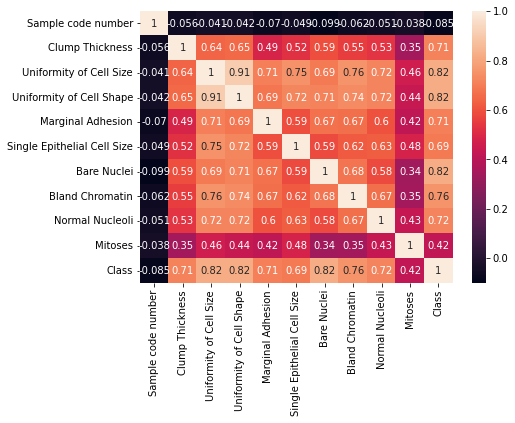

In [6]:
import seaborn as sns
plt.figure(figsize = (7, 5))
sns.heatmap(df.corr(), annot = True)

In [85]:
df.drop('Sample code number',axis = 1,inplace = True) # 'axis = 1' denotes column and 'inplace = True' denotes changes are saved in 'df'

**Data Visualisation**

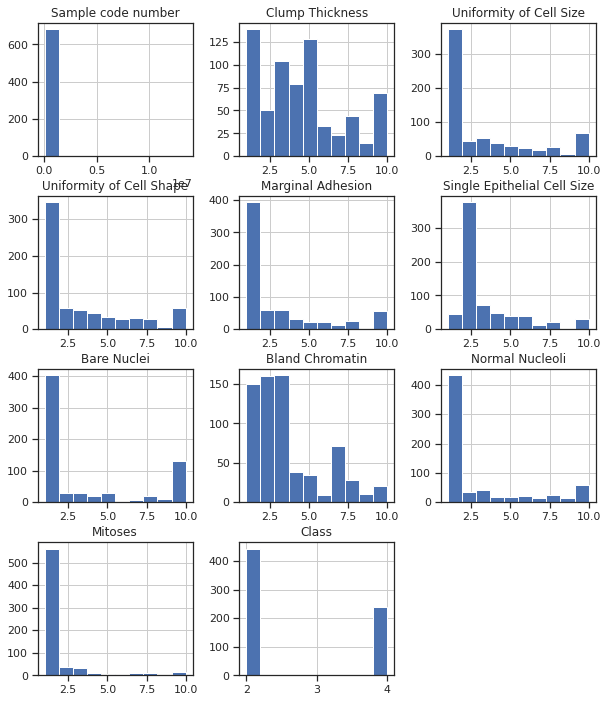

In [42]:
df.hist(figsize = (10,12))
plt.show()

**‘Clump Thickness’ is evenly distributed to some extent. All other variables are skewed to the right.**

<Figure size 720x720 with 0 Axes>

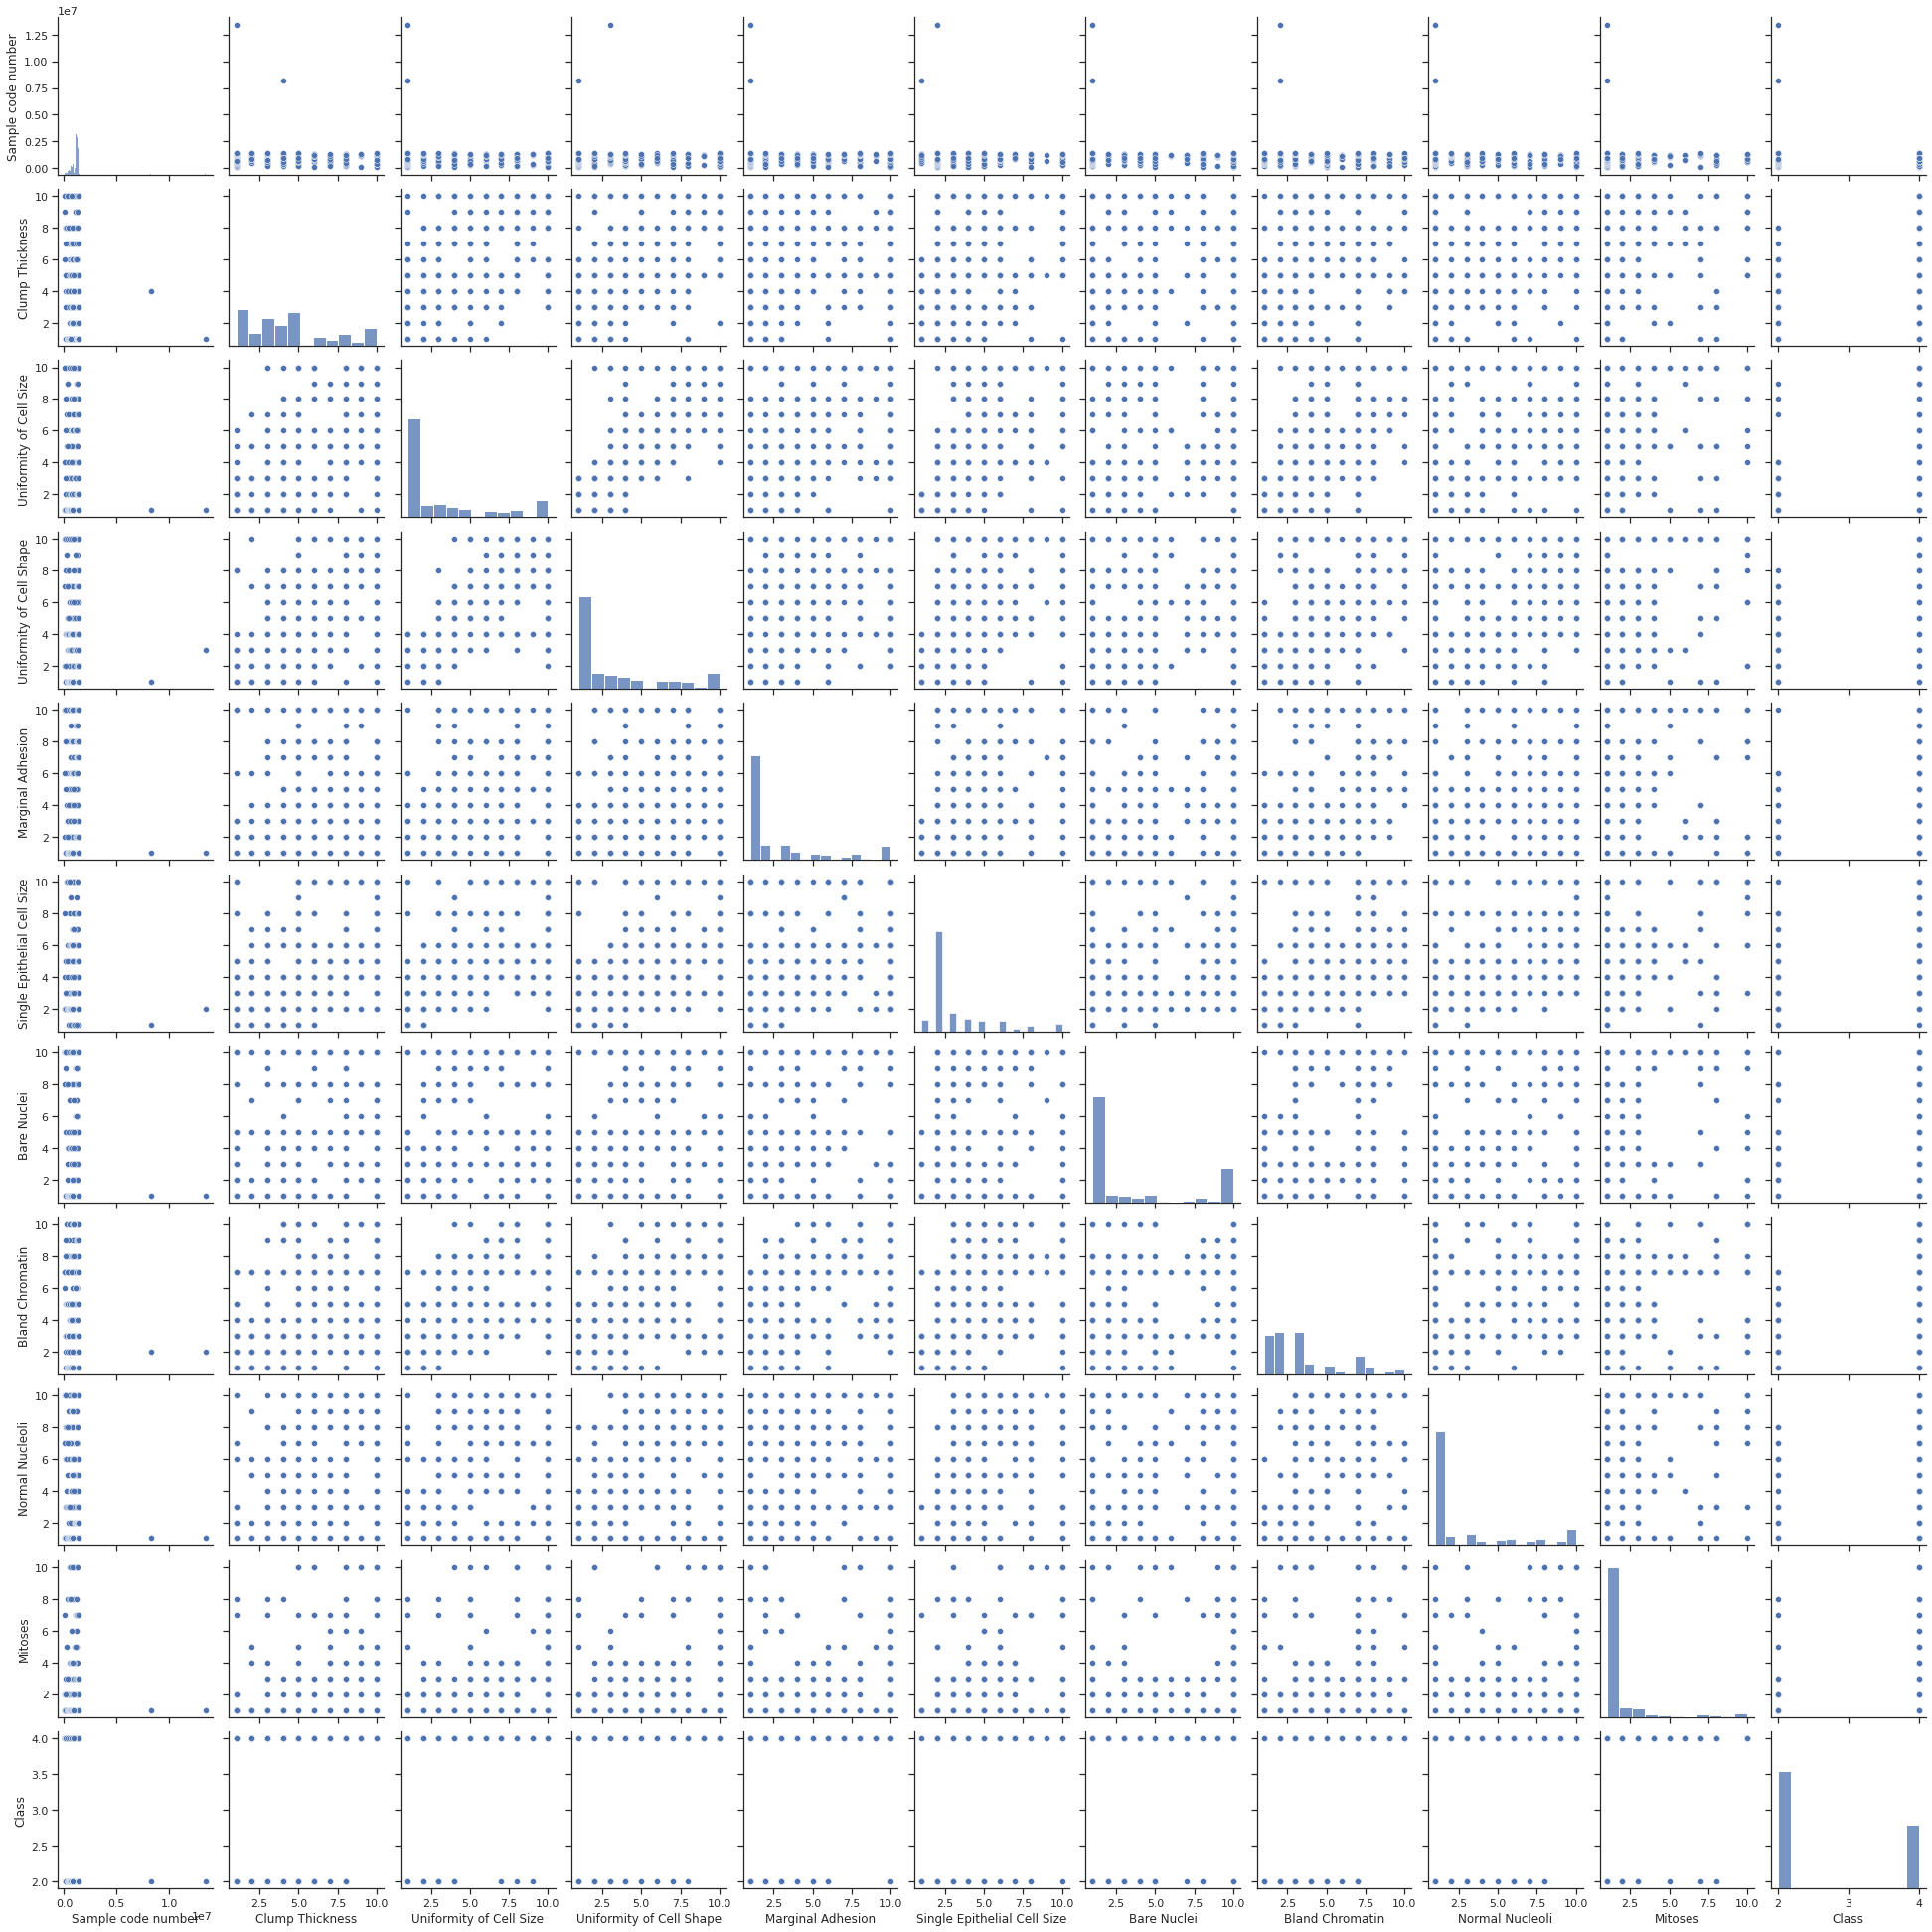

In [43]:
plt.figure(figsize = (10,10))
sns.pairplot(df)

**‘Uniformity Of Cell Size’ seems to have a strong linear relationship with ‘Uniformity Of Cell Shape’.**

In [89]:
df.drop('Bare Nuclei',axis = 1,inplace = True)

# **TRAINING THE MODEL**

**Splitting the dataset into training and test dataset.**

In [98]:
X = df.drop('Class',1) # X is input
y = df['Class'] # y is output
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.2) # Spitting into 'Train_set' and 'Test_set'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


**Checking the length of the training and test dataset**

In [99]:
print("Training Set of X:", len(X_train))
print("Testing Set of X:", len(X_test))
print("Training Set of y:", len(y_train))
print("Testing Set of y:", len(y_test))

Training Set of X: 546
Testing Set of X: 137
Training Set of y: 546
Testing Set of y: 137


# <font color='blue'><b> MODEL 1 - SVC using K-Fold Cross Validation Technique

**Fitting The Model**

In [102]:
validation_type = model_selection.KFold(n_splits = 15) # K-Fold cross validation technique is used.
cross_validation_result1 = model_selection.cross_val_score(SVC(),X_train,y_train,cv = validation_type,scoring = 'accuracy') # Cross validation score of SVC model.
print(cross_validation_result1.mean())

0.9616116116116115


**Performance of SVC model**

In [103]:
a = SVC().fit(X_train,y_train) # Fitting the model.
predictions = a.predict(X_test) # Test set is predicted.
print(accuracy_score(y_test,predictions)) # Accuracy score is calculated.
print(classification_report(y_test,predictions)) # Classification report is generated.

0.9562043795620438
              precision    recall  f1-score   support

           2       0.99      0.95      0.97        91
           4       0.90      0.98      0.94        46

    accuracy                           0.96       137
   macro avg       0.94      0.96      0.95       137
weighted avg       0.96      0.96      0.96       137



**Print The Confusion Matrix**

In [105]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

[[86  5]
 [ 1 45]]


# <font color='blue'><b> MODEL 2 - KNN using K-Fold Cross Validation Technique

**Fitting The Model**

In [109]:
cross_validation_result2 = model_selection.cross_val_score(KNeighborsClassifier(n_neighbors = 10),X_train,y_train,cv = validation_type,scoring = 'accuracy') # Cross validation score of KNN model.
print(cross_validation_result2.mean())

0.9670670670670669


**Performance of KNN model**

In [110]:
b = KNeighborsClassifier(n_neighbors = 5).fit(X_train,y_train) # Fitting the model.
predictions = b.predict(X_test) # Test set is predicted.
print(accuracy_score(y_test,predictions)) # Accuracy score is calculated.
print(classification_report(y_test,predictions)) # Classification report is generated.

0.948905109489051
              precision    recall  f1-score   support

           2       0.98      0.95      0.96        91
           4       0.90      0.96      0.93        46

    accuracy                           0.95       137
   macro avg       0.94      0.95      0.94       137
weighted avg       0.95      0.95      0.95       137



**Print The Confusion Matrix**

In [111]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

[[86  5]
 [ 2 44]]


# <font color='blue'><b> MODEL 3 - Random Forest Classification

**Fitting The Model**

In [112]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

**Predicting The Test Set Results**

In [113]:
y_pred = classifier.predict(X_test)

**Print The Confusion Matrix**

In [114]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[86  5]
 [ 1 45]]


**Evaluate The Model**

In [115]:
from sklearn.metrics import classification_report, accuracy_score

**Classification Report**

In [116]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.99      0.95      0.97        91
           4       0.90      0.98      0.94        46

    accuracy                           0.96       137
   macro avg       0.94      0.96      0.95       137
weighted avg       0.96      0.96      0.96       137



**Accuracy**

In [117]:
print(accuracy_score(y_test,y_pred))

0.9562043795620438


# <font color='blue'><b> MODEL 4 - Decision Tree Classification

**Fitting The Model**

In [118]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

**Predicting The Test Set Results**

In [119]:
y_pred = classifier.predict(X_test)

**Print The Confusion Matrix**

In [120]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[84  7]
 [ 2 44]]


**Evaluate The Model**

In [121]:
from sklearn.metrics import classification_report, accuracy_score

**Classification Report**

In [122]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.98      0.92      0.95        91
           4       0.86      0.96      0.91        46

    accuracy                           0.93       137
   macro avg       0.92      0.94      0.93       137
weighted avg       0.94      0.93      0.94       137



**Accuracy**

In [123]:
print(accuracy_score(y_test,y_pred))

0.9343065693430657


# <font color='blue'><b> MODEL 5 - XGBoost Classification

**Fitting The Model**

In [124]:
# Import the libraries you need to create the XGBoost model.
from xgboost.sklearn import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [125]:
# Create the XGB classifier, xgb_model.
xgb_model = XGBClassifier(use_label_encoder=False, n_jobs=1)

In [126]:
# List the default parameters.
print(xgb_model.get_xgb_params())

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'nthread': 1, 'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 'subsample': 1, 'verbosity': 1, 'use_label_encoder': False}


In [127]:
# Train and evaluate.
xgb_model.fit(X_train, y_train, eval_metric=['error'], eval_set=[((X_train, y_train)),(X_test, y_test)])

[0]	validation_0-error:0.034799	validation_1-error:0.065693
[1]	validation_0-error:0.034799	validation_1-error:0.065693
[2]	validation_0-error:0.034799	validation_1-error:0.065693
[3]	validation_0-error:0.03663	validation_1-error:0.065693
[4]	validation_0-error:0.034799	validation_1-error:0.065693
[5]	validation_0-error:0.032967	validation_1-error:0.065693
[6]	validation_0-error:0.031136	validation_1-error:0.065693
[7]	validation_0-error:0.031136	validation_1-error:0.065693
[8]	validation_0-error:0.029304	validation_1-error:0.065693
[9]	validation_0-error:0.027473	validation_1-error:0.058394
[10]	validation_0-error:0.025641	validation_1-error:0.051095
[11]	validation_0-error:0.025641	validation_1-error:0.051095
[12]	validation_0-error:0.021978	validation_1-error:0.051095
[13]	validation_0-error:0.021978	validation_1-error:0.051095
[14]	validation_0-error:0.020147	validation_1-error:0.051095
[15]	validation_0-error:0.018315	validation_1-error:0.051095
[16]	validation_0-error:0.018315	va

XGBClassifier(use_label_encoder=False)

In [128]:
# Select trained model.
n_trees = 30
y_pred = xgb_model.predict(X_test, ntree_limit= n_trees)

**Predicting The Test Set Results**

In [131]:
y_pred = xgb_model.predict(X_test)

**Print The Confusion Matrix**

In [132]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[86  5]
 [ 2 44]]


**Evaluate The Model**

In [133]:
from sklearn.metrics import classification_report, accuracy_score

**Classification Report**

In [134]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.98      0.95      0.96        91
           4       0.90      0.96      0.93        46

    accuracy                           0.95       137
   macro avg       0.94      0.95      0.94       137
weighted avg       0.95      0.95      0.95       137



**Accuracy**

In [135]:
print(accuracy_score(y_test,y_pred))

0.948905109489051


# <font color='blue'><b> MODEL 6 - Grid Search Classification For XGBoost

**Fitting The Model**

In [136]:
# Create XGBoost pipeline, set up parameter grid.
xgb_model_gs = XGBClassifier(eval_metric=['error'], use_label_encoder=False, n_jobs=1)
parameters = {'reg_alpha': [0.0, 1.0], 'reg_lambda': [0.0, 1.0], 'n_estimators': [n_trees], 'seed': [1337]}

In [137]:
# Search for the best parameters.
clf = GridSearchCV(xgb_model_gs, parameters, scoring='accuracy', cv=5, verbose=-1, n_jobs=1, refit=True)
clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(eval_metric=['error'],
                                     use_label_encoder=False),
             n_jobs=1,
             param_grid={'n_estimators': [30], 'reg_alpha': [0.0, 1.0],
                         'reg_lambda': [0.0, 1.0], 'seed': [1337]},
             scoring='accuracy', verbose=-1)

**Predicting The Test Set Results**

In [141]:
y_pred = clf.predict(X_test)

**Print The Confusion Matrix**

In [142]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[86  5]
 [ 2 44]]


**Evaluate The Model**

In [139]:
y_pred = clf.best_estimator_.predict(X_test, ntree_limit= n_trees)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.1f%%" % (accuracy * 100.0))

Accuracy: 94.9%


**Classification Report**

In [143]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.98      0.95      0.96        91
           4       0.90      0.96      0.93        46

    accuracy                           0.95       137
   macro avg       0.94      0.95      0.94       137
weighted avg       0.95      0.95      0.95       137



**Accuracy**

In [144]:
print("Best score: %.1f%%" % (clf.best_score_*100))
print("Best parameter set: %s" % (clf.best_params_))

Best score: 96.3%
Best parameter set: {'n_estimators': 30, 'reg_alpha': 1.0, 'reg_lambda': 0.0, 'seed': 1337}


# <font color='blue'><b> MODEL 7 - SVM Classification

**Fitting The Model**

In [145]:
from sklearn.svm import SVC
model = SVC() # Instantiating SVM model (basically creating a svm object)

In [146]:
model.fit(X_train, y_train)

SVC()

**Predicting The Test Set Results**

In [147]:
predictions = model.predict(X_test)

**Print The Confuson Matrix**

In [148]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

[[86  5]
 [ 1 45]]


**Evaluate The Model**

In [149]:
from sklearn.metrics import classification_report, accuracy_score

**Classification Report**

In [151]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           2       0.99      0.95      0.97        91
           4       0.90      0.98      0.94        46

    accuracy                           0.96       137
   macro avg       0.94      0.96      0.95       137
weighted avg       0.96      0.96      0.96       137



# <font color='blue'><b> MODEL 8 - Grid Search Classification For SVM.

In [169]:
from sklearn.model_selection import GridSearchCV

**GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested**

In [170]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

<b>
<font color='red'>C</font>: C controls the cost of misclassification of training data. A large C value gives you low bias and high variance. Low bias because you penalize the cost of misclassification. With small C value, it gives you high bias and low variance <br>

<font color='red'>gamma</font>: It is related to the three parameters of rbf. The best default value of gamma is "auto". A large gamma value will lead to high bias and low variance in the model and vice versa

In [171]:
grid = GridSearchCV(SVC(), param_grid, verbose=3)

In [172]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.645 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.651 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.651 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.642 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.642 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.909 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.954 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.954 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.945 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.963 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.964 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

<b><font color='red'>grid.fit</font> will run the same loop with cross-validation to find the best parameter combination.<br><br> Once it has the best combination, it runs fit again on all data passed to that fit without cross validation to build a single new model with best parameter setting.<br> <br>The best parameter setting can be grabbed from the grid object.

**Finding The Best Parameter**

In [173]:
grid.best_params_

{'C': 100, 'gamma': 0.001}

In [174]:
grid.best_estimator_

SVC(C=100, gamma=0.001)

<b>Grid Prediction

In [175]:
grid_predictions = grid.predict(X_test)

**Print Confusion Matrix**

In [176]:
print(confusion_matrix(y_test,grid_predictions))

[[86  5]
 [ 2 44]]


In [177]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           2       0.98      0.95      0.96        91
           4       0.90      0.96      0.93        46

    accuracy                           0.95       137
   macro avg       0.94      0.95      0.94       137
weighted avg       0.95      0.95      0.95       137



# <font color='blue'><b> MODEL 9 -  LOGISTIC REGRESSION

**Fitting The Model**

**Scenario 1 - Applying Logistic Regression Classification Algorithm Directly**

In [161]:
from sklearn.linear_model import LogisticRegression

# Creating the model:
lr = LogisticRegression() 

# Training the model with the training datas:
lr.fit(X_train, y_train)

print('Scenario_1 score of the logistic regression: ', lr.score(X_test, y_test))

Scenario_1 score of the logistic regression:  0.9562043795620438


# <font color='blue'><b> MODEL 10 - Grid Search Classification For LOGISTIC REGRESSION.

**Scenario 2 - Apply Grid Search Cross Validation for Logistic Regression**

In [162]:
from sklearn.model_selection import GridSearchCV

grid = {'C': np.logspace(-3,3,7), 'penalty': ['l1', 'l2']}
# C and penalty are logistic regression regularization parameters
# If C is too small model is underfitted, if C is too big model is overfitted.
# l1 and l2 are regularization loss functions (l1=lasso, l2=ridge)

# Creating the model:
lr = LogisticRegression() 

# Creating GridSearchCV model:
lr_cv = GridSearchCV(lr, grid, cv=10) # Using lr model, grid parameters and cross validation of 10 (10 times of accuracy calculation will be applied) 

# Training the model:
lr_cv.fit(X_train, y_train)

print('best paremeters for logistic regression: ', lr_cv.best_params_)
print('best score for logistic regression after grid search cv:', lr_cv.best_score_)

best paremeters for logistic regression:  {'C': 1.0, 'penalty': 'l2'}
best score for logistic regression after grid search cv: 0.9671043771043772


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

**After the grid search cross validation for logistic regression I found that logistic regression regularization parameters should be:**

<b><font color = 'red'>C = 1.0<br>
penalty = l2</font><br>
for the best scored logistic regression model.

**Accuracy**

In [165]:
lr_tuned = LogisticRegression(C=1.0, penalty='l2')

lr_tuned.fit(X_train, y_train)

print('Scenario_2 (tuned) logistic regression score: ', lr_tuned.score(X_test, y_test))

Scenario_2 (tuned) logistic regression score:  0.9562043795620438


#<font color = 'Red'> **Performance Evaluation For All The Classification Models**

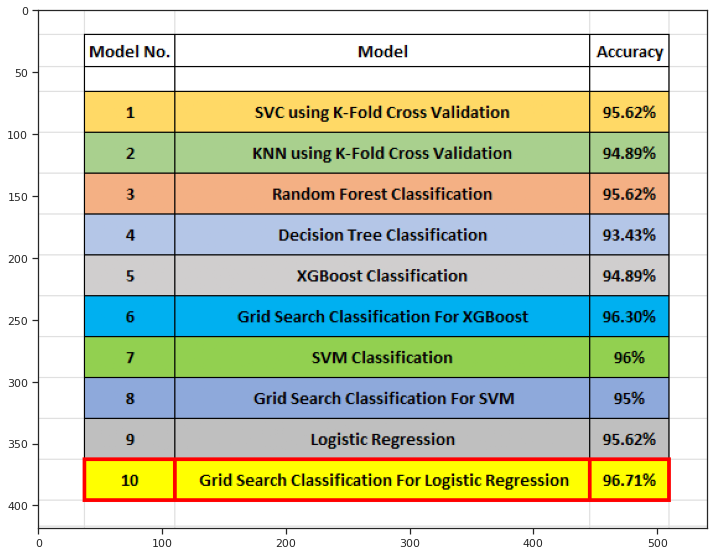

In [191]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/content/midterm.png')
plt.figure(figsize=(12, 12))
imgplot = plt.imshow(img)
plt.show()

# <font color='Red'>**CONCLUSION:**

<b>We can conclude that from our results:<br>
The models having top 3 accuracies are:<br><br>
1. Grid Search Classification For Logistic Regression - 96.71%<br><br> 
2. Grid Search Classification For XGBoost - 96.30%<br><br>
3. SVM Classification - 96%.